In [26]:
!{sys.executable} -m pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [39]:
import sys
import re
import operator
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [7]:
! ./fast_align/build/fast_align

Usage: ./fast_align/build/fast_align -i file.fr-en
 Standard options ([USE] = strongly recommended):
  -i: [REQ] Input parallel corpus
  -v: [USE] Use Dirichlet prior on lexical translation distributions
  -d: [USE] Favor alignment points close to the monotonic diagonoal
  -o: [USE] Optimize how close to the diagonal alignment points should be
  -r: Run alignment in reverse (condition on target and predict source)
  -c: Output conditional probability table
 Advanced options:
  -I: number of iterations in EM training (default = 5)
  -q: p_null parameter (default = 0.08)
  -N: No null word
  -a: alpha parameter for optional Dirichlet prior (default = 0.01)
  -T: starting lambda for diagonal distance parameter (default = 4)
  -s: print alignment scores (alignment ||| score, disabled by default)


# Question 1

The following commands were run to generate the alignment for this question (after the fast_align library build):

* head -n 1 ../../en_fr.txt > ../../q1_raw.txt
* ./fast_align -i ../../q1.txt -d -o -v > ../../q1_forward_align

In [21]:
q1 = (open("./data/q1_forward_align","r+")).read().replace("\n", "").split(" ")
q1_raw = (open("./data/q1_raw.txt","r+")).read().replace("\n", "").split("|||")

In [17]:
q1

['0-0', '1-1', '2-2', '5-3', '4-4', '6-5', '7-6', '8-7', '9-8']

In [22]:
q1_raw

['let us all strive to live and let live . ',
 ' employons-nous tous à vivre et à laisser vivre .']

In [52]:
all_q1_al = []
all_q1_raw = []
for t in q1_raw:
    all_q1_raw.append(t.lstrip().rstrip().split(" "))
for al in q1:
    all_q1_al.append(al.split("-"))
for i in all_q1_al:
    i = [ int(x) for x in i ]

In [55]:
all_q1_al

[['0', '0'],
 ['1', '1'],
 ['2', '2'],
 ['5', '3'],
 ['4', '4'],
 ['6', '5'],
 ['7', '6'],
 ['8', '7'],
 ['9', '8']]

In [67]:
heatmap_arr = [ [] for i in range(10) ]
for mini_arr in heatmap_arr:
    for i in range(9):
        mini_arr.append(0)

In [71]:
for als in all_q1_al:
    heatmap_arr[int(als[0])][int(als[1])] = 1

In [73]:
heatmap_arr = np.array(heatmap_arr)

In [74]:
heatmap_arr

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [98]:
def plot_matrix(heatmap_arr, en, fr):
    fig, ax = plt.subplots(figsize=(15, 8))
    im = ax.imshow(heatmap_arr)

    ax.set_xticks(np.arange(len(fr)))
    ax.set_yticks(np.arange(len(en)))
    ax.set_xticklabels(fr)
    ax.set_yticklabels(en)
    ax.xaxis.set_label_position('top') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax.xaxis.tick_top()
    ax.set_ylim(len(heatmap_arr)-0.5, -0.5)

    ax.set_title("Word Alignment Matrix")
    fig.tight_layout()
    plt.show()

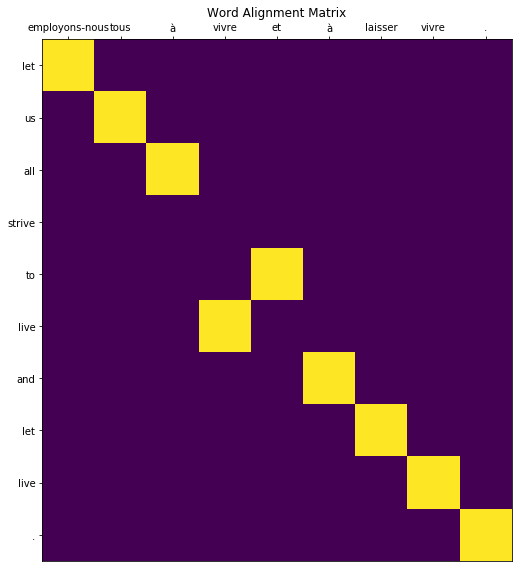

In [99]:
plot_matrix(heatmap_arr, all_q1_raw[0], all_q1_raw[1])

# Question 2

This was run using the following command:

./fast_align -i ../../data/q1_raw.txt -d -o -v -r > ../../data/q2_reverse_align

In [101]:
q2 = (open("./data/q2_reverse_align","r+")).read().replace("\n", "").split(" ")

In [103]:
all_q2_al = []
for al in q2:
    all_q2_al.append(al.split("-"))

In [104]:
all_q2_al

[['0', '0'],
 ['1', '1'],
 ['2', '2'],
 ['3', '2'],
 ['4', '4'],
 ['5', '3'],
 ['6', '5'],
 ['7', '6'],
 ['8', '7'],
 ['9', '8']]

In [105]:
heatmap_arr_q2 = [ [] for i in range(10) ]
for mini_arr in heatmap_arr_q2:
    for i in range(9):
        mini_arr.append(0)

In [106]:
for als in all_q2_al:
    heatmap_arr_q2[int(als[0])][int(als[1])] = 1

In [108]:
heatmap_arr_q2 = np.array(heatmap_arr_q2)

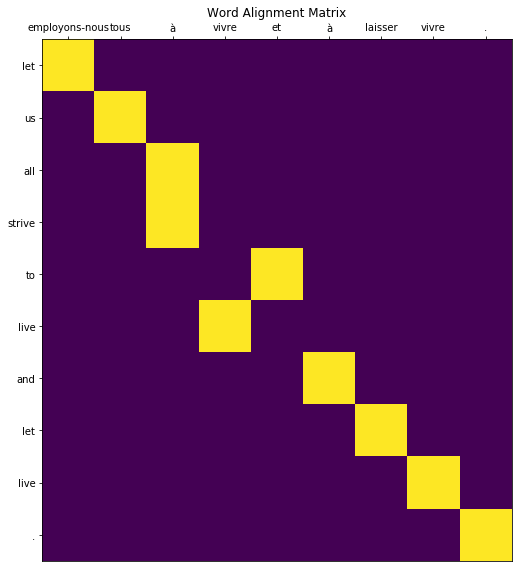

In [110]:
plot_matrix(heatmap_arr_q2, all_q1_raw[0], all_q1_raw[1])

# Question 3

This was run using the following command (as per the instructions):

./atools -i ../../data/q1_forward_align -j ../../data/q2_reverse_align -c grow-diag-final-and > ../../data/q3

In [111]:
q3 = (open("./data/q3","r+")).read().replace("\n", "").split(" ")

In [113]:
all_q3_al = []
for al in q3:
    all_q3_al.append(al.split("-"))

In [114]:
all_q3_al

[['0', '0'],
 ['1', '1'],
 ['2', '2'],
 ['3', '2'],
 ['4', '4'],
 ['5', '3'],
 ['6', '5'],
 ['7', '6'],
 ['8', '7'],
 ['9', '8']]

In [115]:
heatmap_arr_q3 = [ [] for i in range(10) ]
for mini_arr in heatmap_arr_q3:
    for i in range(9):
        mini_arr.append(0)

In [117]:
for als in all_q3_al:
    heatmap_arr_q3[int(als[0])][int(als[1])] = 1
heatmap_arr_q3 = np.array(heatmap_arr_q3)

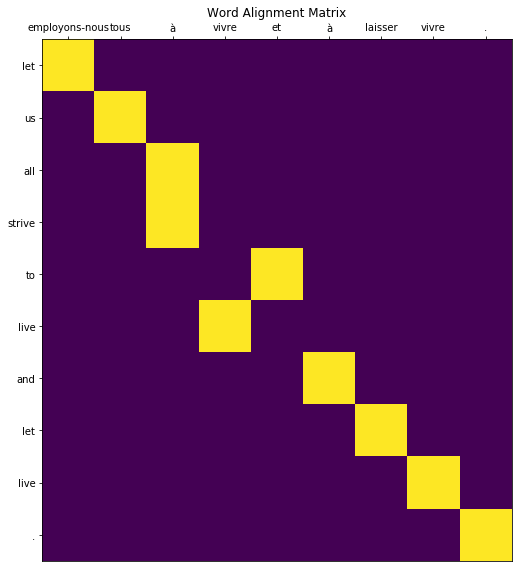

In [118]:
plot_matrix(heatmap_arr_q3, all_q1_raw[0], all_q1_raw[1])

# Question 4

Using a large parallel corpus and a word alignment tool like fast_align (plus any additional post-processing), describe how you could extract a set of paraphrases for English.

There are a lot of ways that paraphrases could be extracted. However, given fast_align, an interesting way to extract them could be done by exploring translations of famous novels. A lot of world-renown novels that were originally written in, for example, French have been translated into English by various famous authors, and some of those, such as "Madame Bovary", have been turned into large parallel corpora. Although this could probably be done by using Neural Networks, fast_align is another quite efficient tool that could solve the problem of detecting and extracting paraphrases. For example, given multiple translations of a famous novel, the use of the exactly same words for translating specific sentences would certainly be a big stepping stone in identifying the paraphrases. Alignment with fast_align is then performed, where the paraphrase likelihood is based on the number of common words in a sentence pair, which is very helpful as quite a lot of paraphrases contain the same words in one way or another. After that, POS-Tagging is used to indetify the core structures of sentences, given nouns and verbs, which allows to map out similarities in potential paraphrases given context. Parse trees could also be used for performing a similar task. The context is defined by the similarities of the alignments. That is, if the context (alignment) is similar in two phrases, they are considered paraphrases. The contexts that seem to be the clearest in predicting a paraphrase are thereafter used in training an unsupervised model for future paraphrase extraction in the given corpus.